# РК-2
## Технологии Машинного Обучения
Угрюмов Михаил Андреевич, ИУ5-64Б, Вариант 18

## Задание
Для заданного набора данных постройте модели классификации или регрессии. Для построения моделей используйте методы:
- линейная/логистическая регрессия
- градиентный бустинг

Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

### **Загрузка датасета**

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
%matplotlib inline

df = pd.read_csv('HRDataset_v14.csv')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [116]:
df.head().T

,0,1,2,3,4
Employee_Name,"Adinolfi, Wilson K","Ait Sidi, Karthikeyan","Akinkuolie, Sarah","Alagbe,Trina","Anderson, Carol"
EmpID,10026,10084,10196,10088,10069
MarriedID,0,1,1,1,0
MaritalStatusID,0,1,1,1,2
GenderID,1,1,0,0,0
EmpStatusID,1,5,5,1,5
DeptID,5,3,5,5,5
PerfScoreID,4,3,3,3,3
FromDiversityJobFairID,0,0,0,0,0
Salary,62506,104437,64955,64991,50825


Буду решать задачу классификации статуса сотрудника - EmploymentStatus.

### **Подготовка датасета**

In [117]:
# удаление ненужных столбцов
# столбец "Sex" можно убрать, так как есть "GenderID"
# столбец "MaritalDesc" можно убрать, так как есть "MartialStatus"
df = df.drop(columns=["Employee_Name", "EmpID", "DOB", "Zip", "Termd", "TermReason", "ManagerName", "ManagerID", "DaysLateLast30", "DateofTermination", "Sex", "MaritalDesc", "DateofHire", "LastPerformanceReview_Date"])

In [118]:
df["EmploymentStatus"].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

In [119]:
# кодирование категориальных признаков

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["EmploymentStatus"] = le.fit_transform(df["EmploymentStatus"])
df["Position"] = le.fit_transform(df["Position"])
df["State"] = le.fit_transform(df["State"])
df["CitizenDesc"] = le.fit_transform(df["CitizenDesc"])
df["HispanicLatino"] = le.fit_transform(df["HispanicLatino"])
df["RaceDesc"] = le.fit_transform(df["RaceDesc"])
df["Department"] = le.fit_transform(df["Department"])
df["RecruitmentSource"] = le.fit_transform(df["RecruitmentSource"])
df["PerformanceScore"] = le.fit_transform(df["PerformanceScore"])

### **Разделение выборки на обучающую и тестовую**

In [120]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 248
Test size: 63


In [121]:
X_train = train.drop('EmploymentStatus', axis=1)
y_train = train['EmploymentStatus']
X_test = test.drop('EmploymentStatus', axis=1)
y_test = test['EmploymentStatus']

### **Обучение моделей**

In [122]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_classifier_model = GradientBoostingClassifier()
gradient_boosting_classifier_model.fit(X_train, y_train)

GradientBoostingClassifier()

### **Результаты обучения**

In [124]:
# предсказание на тестовой выборке
y_pred_lr = logistic_regression_model.predict(X_test)
y_pred_gbc = gradient_boosting_classifier_model.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# оценка качества модели логистической регрессии
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_lr, average='weighted'))

Accuracy: 0.9206349206349206
Precision: 0.9071886064367266
Recall: 0.9206349206349206
F1-score: 0.9109832724290556


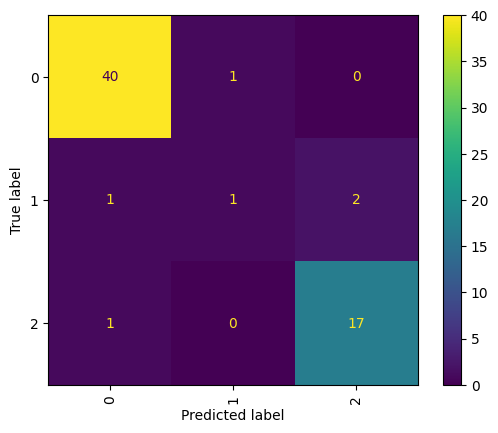

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, xticks_rotation='vertical')

In [127]:
# оценка качества модели градиентного бустинга
print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("Precision:", precision_score(y_test, y_pred_gbc, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_gbc, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_gbc, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


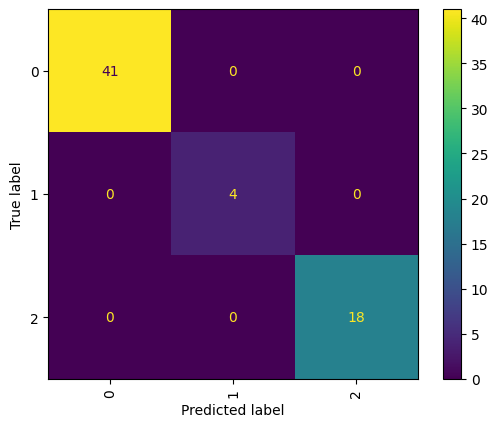

In [128]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gbc, xticks_rotation='vertical')

### **Выводы**

In [ ]:
Как видно, градиентный бустинг показывает идеальное значение по всем метрикам.
Это означает, что модель идеально решает задачу классификации.

Модель логистической регрессии тоже показывает отличные результаты, недалекие от идеальной классификации.

На основании полученных результатов можно сделать вывод, что модель градиентного бустинга на этом наборе данных
обеспечивает более высокие показатели метрик, чем модель логистической регрессии.